In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
setosa = df[df['species'] == 'Iris-setosa']
versicolor = df[df['species'] == 'Iris-versicolor']
virginica = df[df['species'] == 'Iris-virginica']

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

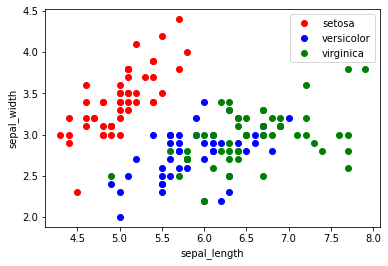

In [6]:
plt.plot(setosa['sepal_length'], setosa['sepal_width'], 'ro', label = 'setosa')
plt.plot(versicolor['sepal_length'], versicolor['sepal_width'], 'bo', label = 'versicolor')
plt.plot(virginica['sepal_length'], virginica['sepal_width'], 'go', label = 'virginica')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

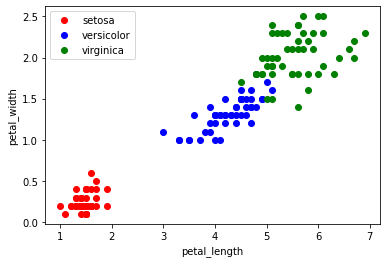

In [7]:
plt.plot(setosa['petal_length'], setosa['petal_width'], 'ro', label = 'setosa')
plt.plot(versicolor['petal_length'], versicolor['petal_width'], 'bo', label = 'versicolor')
plt.plot(virginica['petal_length'], virginica['petal_width'], 'go', label = 'virginica')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.show()

In [8]:
len(df)

150

In [9]:
print('Length of setosa: %d' %(len(setosa)))
print('Length of versicolor: %d' %(len(versicolor)))
print('Length of virginica: %d' %(len(virginica)))

Length of setosa: 50
Length of versicolor: 50
Length of virginica: 50


In [10]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train = df[df['is_train'] == True]
test = df[df['is_train'] == False]

In [11]:
train_x = train[train.columns[:len(train.columns) - 2]]
train_y = train['species']

In [12]:
test_x = test[test.columns[:len(test.columns) - 2]]
test_y = test['species']

In [13]:
def euclidean_distance(data1, data2):
    distance = 0
    for i in range(data2.shape[0]):
        distance += np.square(data1[i] - data2[i])
    return np.sqrt(distance)

In [14]:
def manhattan_distance(data1, data2):
    distance = 0
    for i in range(data2.shape[0]):
        distance += abs(data1[i] - data2[i])
    return distance

In [15]:
def knn(train_x, train_y, dis_func, sample, k):
    """
    Parameters:
    train_x: training samples
    train_y: corresponding labels
    dis_func: calculates distance
    sample: one test sample
    k: number of nearest neighbors
    
    Returns:
    cl: class of the sample
    """
    
    distances = {}
    for i in range(len(train_x)):
        d = dis_func(sample, train_x.iloc[i])
        distances[i] = d
    sorted_dist = sorted(distances.items(), key = lambda x : (x[1], x[0]))
    
    # take k nearest neighbors
    neighbors = []
    for i in range(k):
        neighbors.append(sorted_dist[i][0])
    
    #convert indices into classes
    classes = [train_y.iloc[c] for c in neighbors]
    
    #count each classes in top k
    counts = Counter(classes)
    
    #take vote of max number of samples of a class
    list_values = list(counts.values())
    list_keys = list(counts.keys())
    cl = list_keys[list_values.index(max(list_values))]
    
    return cl

In [16]:
sl = knn(train_x, train_y, euclidean_distance, test_x.iloc[3], 5)

In [17]:
test_y.iloc[3]

'Iris-setosa'

In [18]:
sl

'Iris-setosa'

In [19]:
def get_accuracy(test_x, test_y, train_x, train_y, k):
    correct = 0
    for i in range(len(test_x)):
        sample = test_x.iloc[i]
        true_label = test_y.iloc[i]
        predicted_label_euclidean = knn(train_x, train_y, euclidean_distance, sample, k)
        if predicted_label_euclidean == true_label:
            correct += 1
    
    accuracy_euclidean = (correct / len(test_x)) * 100
    
    correct = 0
    for i in range(len(test_x)):
        sample = test_x.iloc[i]
        true_label = test_y.iloc[i]
        predicted_label_euclidean = knn(train_x, train_y, manhattan_distance, sample, k)
        if predicted_label_euclidean == true_label:
            correct += 1
    
    accuracy_manhattan = (correct / len(test_x)) * 100
    
    print("Model accuracy with Euclidean Distance is %.2f" %(accuracy_euclidean))
    print("Model accuracy with Manhattan Distance is %.2f" %(accuracy_manhattan))    

In [20]:
get_accuracy(test_x, test_y, train_x, train_y, 5)

Model accuracy with Euclidean Distance is 93.18
Model accuracy with Manhattan Distance is 90.91


# Testing with pre made model of KNN from sklearn

In [21]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
df = df.drop('is_train', axis = 1)

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

In [25]:
classifier = neighbors.KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train, y_train)

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.9737
